In [1]:
#%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.collections as collections
import scipy.io as sio
import numpy as np
import pandas as pd

In [2]:
subject = "R040"
sentence = sio.loadmat('data/sEMG/%s/sentence1.mat' % subject)

In [3]:
# Load all raw data values for vowels
Tmp_Data = sentence['data']
Start = sentence['datastart']
End = sentence['dataend']
Sample_Rate = sentence['samplerate']

sample_rate = int(Sample_Rate[4,0])
sample_len  = int(End[4,0] - Start[4,0] + 1)
print("Sample Rate: ", sample_rate)
print("Signal Length: ", sample_len)
print("Total time: %d seconds" % (sample_len/sample_rate))

Sample Rate:  20000
Signal Length:  80000
Total time: 4 seconds


In [12]:
# Select from 0~49
n = 54

# combine both channel voices
voice_sample_channel = np.zeros((sample_len, 2))

# For the left channel
voice_start = int(Start[4,n]) - 1
voice_end = int(End[4,n])
voice_sample_tmp = Tmp_Data[0,voice_start:voice_end]
voice_sample_channel[:,0] = voice_sample_tmp - np.mean(voice_sample_tmp)

# For the right channel
voice_start = int(Start[5,n]) - 1
voice_end = int(End[5,n])
voice_sample_tmp = Tmp_Data[0,voice_start:voice_end]
voice_sample_channel[:,1] = voice_sample_tmp - np.mean(voice_sample_tmp)

voice_sample = np.mean(voice_sample_channel, axis=1, 
                       dtype=voice_sample_channel.dtype)

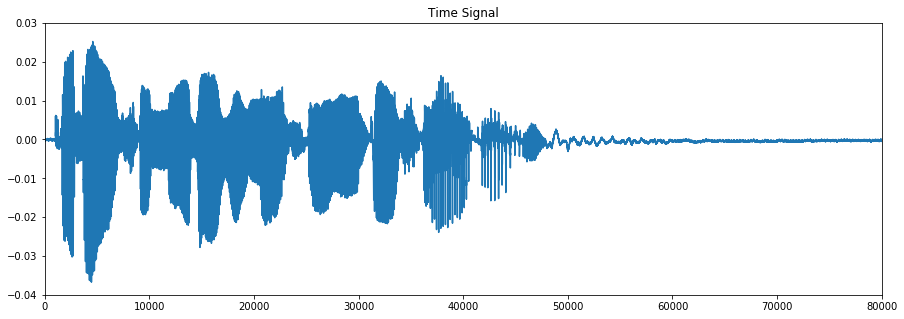

In [13]:
plt.figure(figsize=(15,5))
plt.plot(voice_sample)
plt.xlim([0, 80000])
plt.ylim([-0.04, 0.03])
plt.title('Time Signal')
plt.show()

In [14]:
i_start = []
text   = []
with open('ctm/test/ctm', 'r') as file1:
    for line in file1:
        utt_id = line.split(' ')[0]
        rep = int(utt_id.split('_')[2])
        
        if rep == (n+1):
            bt     = float(line.split(' ')[2])
            dur    = float(line.split(' ')[3])
            word   = line.split(' ')[4]
            
            i_start.append(bt)
            text.append(word)
            
            print("Utterance ID: %s"%utt_id)
            print("Repetition: %d"%rep)
            print("Begin Time: %f"%bt)       
            print("Duration: %f"%dur)
            print(word)
            
print(i_start)

Utterance ID: R040_s1_55
Repetition: 55
Begin Time: 0.000000
Duration: 0.290000
the
Utterance ID: R040_s1_55
Repetition: 55
Begin Time: 0.290000
Duration: 0.120000
dew
Utterance ID: R040_s1_55
Repetition: 55
Begin Time: 0.410000
Duration: 0.830000
shimmered
Utterance ID: R040_s1_55
Repetition: 55
Begin Time: 1.240000
Duration: 0.350000
over
Utterance ID: R040_s1_55
Repetition: 55
Begin Time: 1.590000
Duration: 0.180000
my
Utterance ID: R040_s1_55
Repetition: 55
Begin Time: 1.770000
Duration: 0.360000
shiny
Utterance ID: R040_s1_55
Repetition: 55
Begin Time: 2.130000
Duration: 0.230000
blue
Utterance ID: R040_s1_55
Repetition: 55
Begin Time: 2.360000
Duration: 0.130000
shell
Utterance ID: R040_s1_55
Repetition: 55
Begin Time: 2.490000
Duration: 1.490000
again
[0.0, 0.29, 0.41, 1.24, 1.59, 1.77, 2.13, 2.36, 2.49]


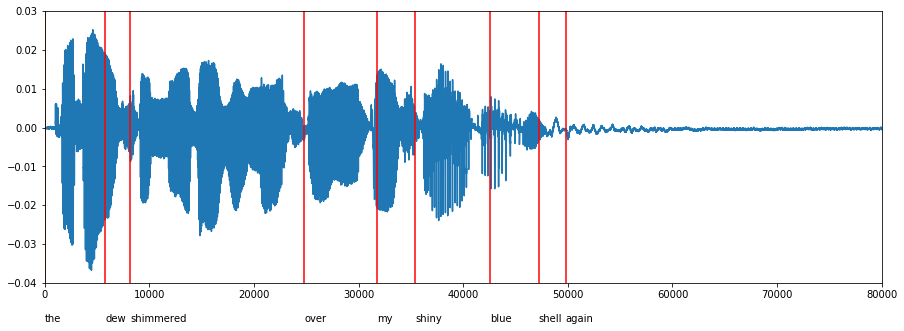

In [20]:
plt.figure(figsize=(15,5))
plt.plot(voice_sample)
plt.xlim([0, 80000])
plt.ylim([-0.04, 0.03])
for i,w in zip(i_start,text):
    plt.axvline(x=i*sample_rate, color='r')
    plt.text(i*sample_rate, -0.05, w, size='medium')
    
plt.title('Words Segmentation')
plt.show(